##  Decision Tree

Decision trees are used in everyday life decisions, not just in machine learning. Flow diagrams are actually visual representations of decision trees. For example, Higher School of Economics publishes information diagrams to make the lives of its employees easier. Here is a snippet of instructions for publishing a paper on the Institution portal.

![Decision Tree Example](../../../../img/topic3_dt_picture_eng.png)

A decision tree is often a generalization of the experts' experience, a means of sharing knowledge of a particular process. For example, before the introduction of scalable machine learning algorithms, the credit scoring task in the banking sector was solved by experts. The decision to grant a loan was made on the basis of some intuitively (or empirically) derived rules that could be represented as a decision tree.

![Decision Tree Example2](../../../../img/topic3_credit_scoring_tree_eng.png)

### Tree-building Algorithm

```python
def Grow_Tree(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right (Based on target variance)
        t.left = build(L_left)
        t.right = build(L_right)
    return t     
```

### Decision Tree in a Regression Problem

When predicting a numeric variable, the idea of a tree construction remains the same, but the quality criteria changes: 

- Variance around the mean: 

$$\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \frac{1}{\ell} \sum\limits_{i =1}^{\ell} y_i)^2, $$

where $\ell$ is the number of samples in a leaf, $y_i$ is the value of the target variable. Simply put, by minimizing the variance around the mean, we look for features that divide the training set in such a way that the values of the target feature in each leaf are roughly equal.

In [6]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

### Code Dictionary
code | description
-----|------------
`.iloc` | Pandas purely integer-location based indexing for selection by position.
`.DecisionTreeRegressor` | Regression model with Decision Trees.
`.arrange()` | Generates evenly spaced values within a given interval.
`.reshape()` | Gives a new shape to an array without changing its data.

In [7]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values.reshape(-1, 1)

In [8]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

Text(0, 0.5, 'Salary')

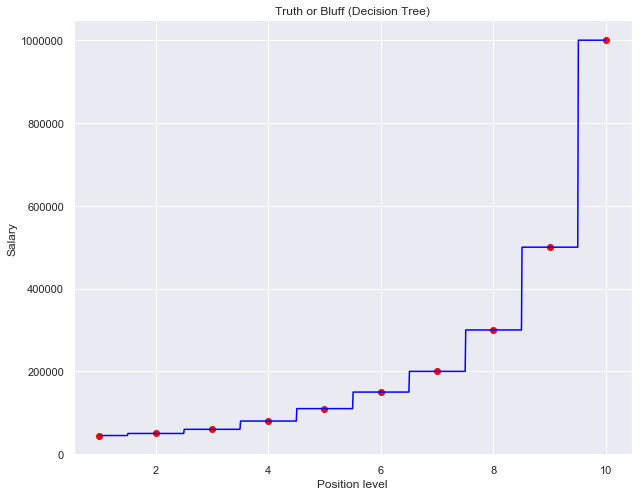

In [10]:
# Visualising the Decision tree results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree)')
plt.xlabel('Position level')
plt.ylabel('Salary')